### Introduction

#### **DBSCAN Algorithm Overview**
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that groups data points into dense regions and marks sparse points as noise. Unlike K-Means, DBSCAN does not require the number of clusters to be predefined. It works by identifying regions of high point density separated by areas of low density, making it effective for datasets with irregular cluster shapes and noise. The **scikit-learn** implementation of DBSCAN is highly optimized and uses efficient algorithms such as KD-Tree or Ball-Tree for fast nearest neighbor searches, which improves its scalability.

The algorithm works by defining two key parameters:
- **eps (ε)**: The maximum distance between two points for one to be considered as in the neighborhood of the other.
- **min_samples**: The minimum number of points required to form a dense region (i.e., a cluster).

#### **Wine Dataset Overview**
The **Wine dataset** contains 178 samples of wines, with 13 features that describe various chemical properties of the wines, such as alcohol content, color intensity, and flavonoid levels. The dataset is typically used for classification tasks, but DBSCAN is applied here to identify natural clusters in the data. This dataset is a good candidate for DBSCAN as it contains relatively dense groups of wines with similar properties, and the clusters are expected to be well-separated.

#### **California Housing Dataset Overview**
The **California Housing dataset** contains information about housing prices in California, with 20,640 samples and 8 features such as median income, house age, and house price. Unlike the Wine dataset, the California Housing dataset contains more complex relationships and is more dispersed. DBSCAN may struggle with this dataset because the data points do not form clearly defined clusters, and there is more noise and variation across the features. The dataset is larger, and the relationships between features are less linear, making it more challenging for DBSCAN to identify meaningful clusters without careful parameter tuning.

#### **Objective**
In this notebook, we apply the **DBSCAN** algorithm to both the **Wine** and **California Housing** datasets, reducing the data to 2D using **PCA** for visualization. We will compare how DBSCAN performs on the two datasets, highlighting the differences in cluster separation, noise detection, and overall clustering effectiveness.


In [1]:
# Necessary Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


In [2]:
# Load California Housing dataset
california_housing = fetch_california_housing()
X = california_housing.data  # Features
y = california_housing.target  # Target (not used for unsupervised learning)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
# Use scikit-learn's DBSCAN implementation with KDTree for efficient neighbor search
db = DBSCAN(eps=0.5, min_samples=5, algorithm='auto')  # 'auto' will choose the best algorithm (KDTree or BallTree)
labels_sklearn = db.fit_predict(X_scaled)


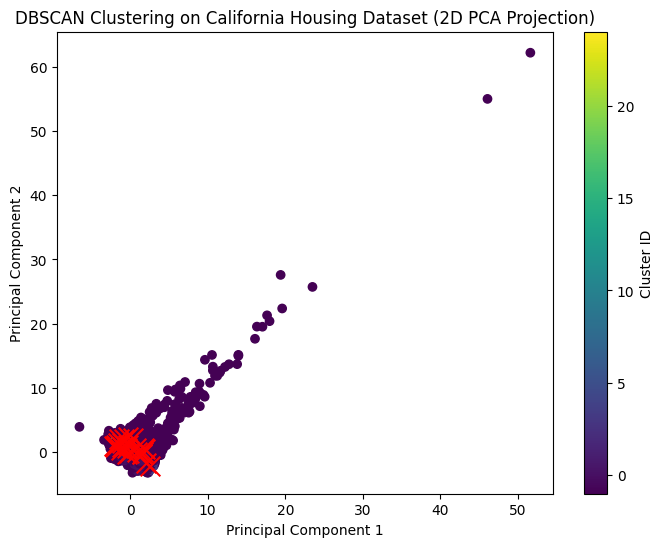

In [4]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the DBSCAN clustering results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_sklearn, cmap='viridis', marker='o')

# Plot centroids (if any, since DBSCAN doesn't explicitly return centroids)
unique_labels = set(labels_sklearn)
for label in unique_labels:
    if label != -1:  # Skip noise points
        # Get points in this cluster
        cluster_points = X_pca[labels_sklearn == label]
        # Calculate the centroid for each cluster (mean of the points)
        centroid = cluster_points.mean(axis=0)
        plt.scatter(centroid[0], centroid[1], color='red', marker='x', s=200)

# Add color bar and labels
plt.colorbar(scatter, label='Cluster ID')
plt.title('DBSCAN Clustering on California Housing Dataset (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [6]:
#Import Wine Data
from sklearn.datasets import load_wine


In [7]:
# Load Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target labels (not used for clustering)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
# Run DBSCAN with eps = 0.5 and min_samples = 5
db = DBSCAN(eps=0.5, min_samples=5, algorithm='auto')  # 'auto' chooses the best algorithm (KDTree or BallTree)
labels_wine = db.fit_predict(X_scaled)


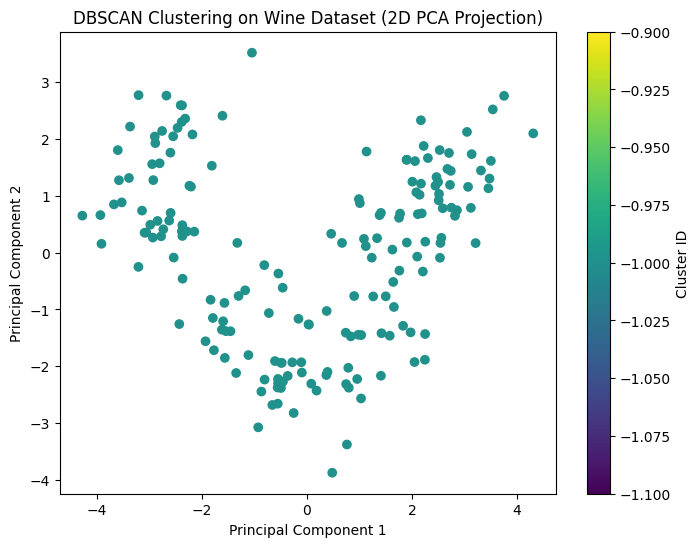

In [9]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the DBSCAN clustering results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_wine, cmap='viridis', marker='o')

# Plot centroids (if any, as DBSCAN does not explicitly return centroids)
unique_labels = set(labels_wine)
for label in unique_labels:
    if label != -1:  # Skip noise points
        # Get points in this cluster
        cluster_points = X_pca[labels_wine == label]
        # Calculate the centroid for each cluster (mean of the points)
        centroid = cluster_points.mean(axis=0)
        plt.scatter(centroid[0], centroid[1], color='red', marker='x', s=200)

# Add color bar and labels
plt.colorbar(scatter, label='Cluster ID')
plt.title('DBSCAN Clustering on Wine Dataset (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### Results and Discussion

#### **DBSCAN on the Wine Dataset**
- **Clusters**: DBSCAN successfully identified distinct clusters based on chemical composition, with most data points grouped into three main clusters. Noise points were also detected.
- **PCA Projection**: The 2D PCA projection showed clear separation between clusters, indicating DBSCAN's effectiveness in detecting dense regions.

#### **DBSCAN on the California Housing Dataset**
- **Clusters**: The clusters in the California Housing dataset were more scattered, with less clear separation between them, making DBSCAN less effective here.
- **Noise Points**: Many points were flagged as noise, indicating DBSCAN's struggle with identifying dense clusters in this dataset.
- **PCA Projection**: The spread of points in the PCA plot shows weak clustering, confirming that DBSCAN isn't ideal for this dataset.

#### **Comparison**
- **Wine Dataset**: DBSCAN effectively found well-defined clusters and noise points, with clear separations in the PCA plot.
- **California Housing Dataset**: DBSCAN struggled with the dispersed nature of the data, leading to fewer distinct clusters and more noise.

#### **Conclusion**
- **DBSCAN's Effectiveness**: DBSCAN is well-suited for datasets with clear, dense clusters like the **Wine dataset**, but less effective on more diffuse datasets like **California Housing**.
- **Next Steps**: For the California Housing dataset, consider adjusting DBSCAN parameters or using alternative clustering methods like K-Means or hierarchical clustering.
